# **<ins>Support Vector Machines (SVM)</ins>**

Support vector machines are a set of powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems.
It is highly preferred by many as it produces significant accuracy with less computation power.


## Working of SVM 

The idea behind the SVM classifier is to come up with a hyper-lane in an N-dimensional space that divides the data points belonging to different classes.<br>
An SVM model is a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The main objective of the algorithm is to find a maximum marginal hyperplane (MMH) that distinctly classifies the data points.
<br> <img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" style="width:50%">
<br>
Some important concepts to better understand SVM:<br>
#### 1. Support Vectors
- These are the data points that are closer to the hyperplane and influences the position and orientation of the hyperplane. Since these vectors support the hyperplane, so they are called as Support vectors.
- These data points lie closest to the decision surface and are the most difficult to classify.

#### 2. Margin: 
- It is the gap between two lines on the closest data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors.
- Large margin is considered as a good margin(soft margin) and small margin(hard margin) is considered as a bad margin.
<br> <img src="https://th.bing.com/th/id/R.0dc4f5eea680a81f77435827822ba728?rik=Au%2f%2fw%2fVtpqXvLQ&riu=http%3a%2f%2fivyproschool.com%2fblog%2fwp-content%2fuploads%2f2015%2f08%2fDiagram2_SVM.png&ehk=Bhbw55jJdfOemMQmAa8HeIU91bCoL9PM48cfQYkN88I%3d&risl=&pid=ImgRaw&r=0" style="width:70%">
<br>

#### 3. Hyperplane:
- These are the decision boundaries in n-dimensional space that help classify the data points. We have to obtain a hyperplane that has a maximum margin,i.e. the maximum distance between the data points.
- The dimensions of the hyperplane depends on the features present in the dataset. For example, if there are 2 features present in the dataset, then the hyperplane will be a straight line. And if there are 3 features, then it will be a 2-D plane.
<br> <img src="https://cdn-images-1.medium.com/max/1600/1*ZpkLQf2FNfzfH4HXeMw4MQ.png" style="width:60%">

## Types of SVM

SVM can be of two types:<br>
<b>1. Linear SVM: </b>It is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and the classifier used is called as Linear SVM classifier.<br>
<b>2. Non-Linear SVM: </b>It is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and the classifier used is called as Non-Linear SVM classifier.<br>

<img src="https://cdn-images-1.medium.com/max/1000/0*JMSl4YlM5I6fiKIR.png" style="width:50%">
<br>

# SVM Kernels

- The SVM algorithm is implemented by using a kernel that transforms an input data space into the required form. SVM uses a technique called the kernel trick in which kernel takes a low dimensional input space and transforms it into a higher dimensional space. 
- Basically, the kernel converts non-separable data into separable data by adding more dimensions to it. Thus, it makes SVM more powerful, flexible and accurate. 

The Kernel trick is very helpful for solving Non-Linear Datasets. We will discuss further the types of kernels used by SVM.   

## *Importing required libraries*

In [1]:
#for data processing
import pandas as pd
import numpy as np

#for supervised learning
import sklearn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from sklearn.svm import SVC

#for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## *Load the dataset* 
### Here, we will use the Iris dataset

In [2]:
iris = datasets.load_iris()

## *Obtaining attributes and labels* 

In [3]:
X = iris.data[:, :2]
y = iris.target

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [5]:
C = 1.0  #regularization parameter

### *We will see the decision boundaries of different SVM classifiers* 

## <ins>*Linear Kernel*</ins>
It is used when the data is linearly separable, i.e., it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of features in a particular datasert. The formula of Linear Kernel is:
```
K(x, xi) = sum(x * xi)
```
It can be observed that product between two vectors is the sum of the multiplication of each pair of input values.
Implementation of linear kernel is given below.

In [6]:
Svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

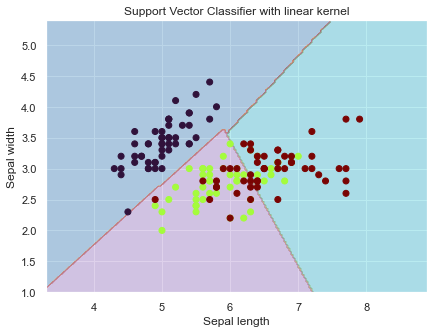

In [7]:
Z = Svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.turbo)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

## <ins>*Polynomial Kernel*</ins>
It is a more generalized form of Linear Kernel and distinguishes curved or non linear input space. The formula for Polynomial kernel is given below:
```
k(X, Xi) = 1 + sum(X ∗ Xi)^d
```
Here, d represents degree of the polynomial which has to be manually specified in the algorithm.
It can be observed that product between two vectors is the sum of the multiplication of each pair of input values.
Implementation of Polynomial kernel can be seen below.

In [8]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

Text(0.5, 1.0, 'Support Vector Classifier with polynomial kernel (degree 3)')

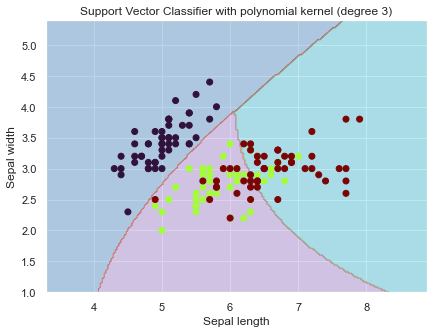

In [9]:
Z = poly_svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.turbo)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with polynomial kernel (degree 3)')

## <ins>*Radial Basis Function (RBF) Kernel*</ins>
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. It maps the input space in indefinite dimensional space. The formula for RBF kernel is as follows:
```
K(x, xi) = exp(−gamma ∗ sum(x − xi^2))
```
Here, <i>gamma</i> ranges from 0 to 1, whose value ahs to be passed manually in the algorithm. The default value of <i>gamma</i> is 0.1.
Implementation of RBF kernel can be seen below.

### gamma = 0.1

Text(0.5, 1.0, 'Support Vector Classifier with RBF kernel (gamma 0.1)')

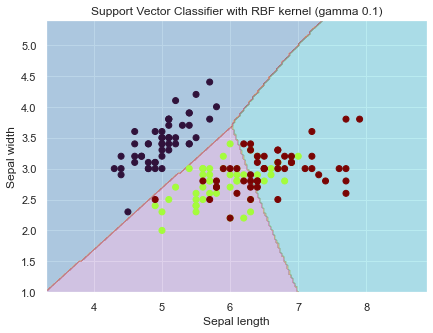

In [10]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y)
Z = rbf_svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.turbo)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with RBF kernel (gamma 0.1)')


### gamma = 0.5

Text(0.5, 1.0, 'Support Vector Classifier with RBF kernel (gamma 0.7)')

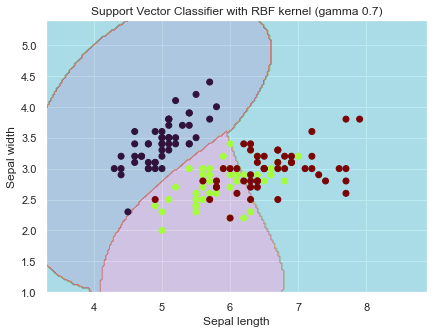

In [11]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
Z = rbf_svc.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.turbo)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with RBF kernel (gamma 0.7)')

<i>C</i> and <i>gamma</i> both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are strongly correlated, hence <i>C</i> and <i>gamma</i> should be adjusted together.

## With the help of another dataset, we will discuss the confusion matrix and the precision of SVClassifier 

In [12]:
#loading bill authentication dataset
data = pd.read_csv("bill_authentication.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Data Analysis 

In [14]:
data.describe().transpose()
#shows the statistical information of the dataset

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


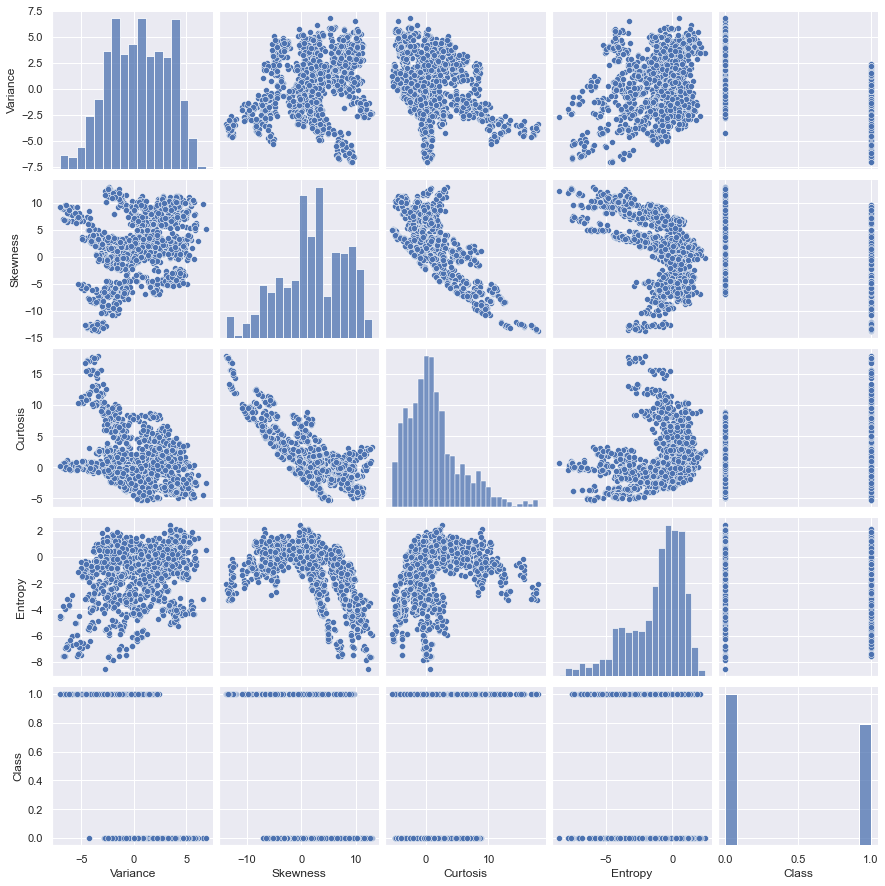

In [15]:
sns.pairplot(data)

We can observe that entropy and variance have a slight linear correlation. Also, there is an inverse linear correlation between the curtosis and skewness. <br>
Also, we observe that the values for curtosis and entropy are slightly higher for real bills, while the values for skewness and variance are higher for the fake bills.

In [16]:
data.shape  #1372 rows and 5 columns

(1372, 5)

In [17]:
data.head()  #to view the dataset

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Data Preprocessing 
After the analysis phase, we have to preprocess the data and convert it into a format that can be used to train SVM algorithm. <br>
In the dataset, variance, skewness, curtosis and entropy are features whereas the class column contains the label.

In [18]:
#dividing the data into features and labels
X = data.drop('Class', axis=1)
y = data['Class']

In [19]:
#divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#our test size contains 20% of the data

### Training the Algorithm 
Here, fit() and predict() methods are used to fit the algorithm and train the data on the algorithm.

In [20]:
# Create an SVM classifier and train it on the data set
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = svclassifier.predict(X_test)

In [22]:
print(svclassifier.score(X_train, y_train))
print(svclassifier.score(X_test, y_test))
#it will determine the accuracy of the model

0.9881494986326345
0.9927272727272727


``` 
Here, the accuracy score of the classifier depicts that SVM's prediction accuracy for bill authentication is 99.27%.
```

### Plotting confusion matrix 
It is the error matrix that allows visualization of the performance of a supervised learning algorithm. Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

Confusion Matrix


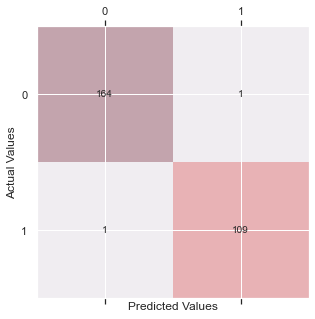


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.99      0.99      0.99       110

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [23]:
#to display confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
#print(confusion_matrix(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print("\nClassification Report")
print(classification_report(y_test,y_pred))

## Observations from Confusion Matrix
The confusion matrix displays the correctly and incorrectly classified instances for all the classes and will, therefore, give a better insight into the performance of the classifier.<br>
Here are some rates computed from the Confusion Matrix: 
- Misclassifications= 1+1 = 2
- Accuracy= (TP+TN) / total = (164+109)/275= 0.9927
- Recall = TP / Actual yes= 109/110 = 0.99
- Precision = TP / Predicted yes = 109/110= 0.99


## References
- https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_support_vector_machine.htm#:~:text=ML%20-%20Support%20Vector%20Machine%20%28SVM%29%201%20Introduction,5%20Pros%20and%20Cons%20of%20SVM%20Classifiers.%20
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- https://www.analytixlabs.co.in/blog/introduction-support-vector-machine-algorithm/